<a href="https://colab.research.google.com/github/delhian/try_pytorch/blob/main/FeedForwardvsConv2D_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Disign model (input, output size,)

2) Construct loss and optimizer

3) Training loop

-- forward pass: compute prediction and loss

-- backward pass: calculate gradients

-- update weights

In [113]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [114]:
device = torch.device('cuda' if torch.cuda.is_available()  else 'cpu')
device

device(type='cuda')

In [115]:
# MNIST
train_dataset = torchvision.datasets.MNIST(root = './data', 
                                           transform = transforms.ToTensor(),
                                           train = True, 
                                           download = True)

test_dataset = torchvision.datasets.MNIST(root = './data', 
                                           transform = transforms.ToTensor(),
                                           train = False)

In [116]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = 50, shuffle = True, )
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = 50)

In [117]:
example = iter(train_loader)
samples, labels = example.next()

print(samples.shape, labels.shape)

torch.Size([50, 1, 28, 28]) torch.Size([50])


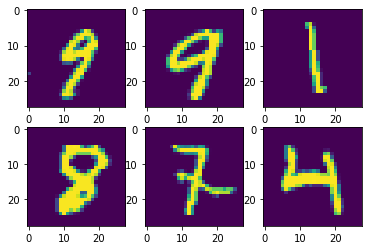

In [118]:
for i in range(6):
  plt.subplot(2, 3, i + 1)
  plt.imshow(samples[i][0])
plt.show()

In [119]:
class FeedForward(nn.Module):
  def __init__(self, input_size, hidden_size, n_classes):
    super().__init__()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(hidden_size, n_classes)
  def forward(self, x):
    out = self.linear1(x)
    out = self.relu(out)
    out = self.linear2(out)
    return out

input_size = 28 * 28
hidden_size = 100
n_classes = 10

model = FeedForward(input_size, hidden_size, n_classes)
model = model.to(device)
loss = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [120]:
epoches = 10
for epoch in range(epoches):
  for i, (image, label) in enumerate(train_loader):
    image = image.reshape(-1, input_size).to(device)
    label = label.to(device)
    outputs = model(image)
    l = loss(outputs, label)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()
  print(f'epoch:{epoch + 1} loss: {l:.8f}')

epoch:1 loss: 0.18289673
epoch:2 loss: 0.08233259
epoch:3 loss: 0.11911218
epoch:4 loss: 0.11969343
epoch:5 loss: 0.19842604
epoch:6 loss: 0.05601371
epoch:7 loss: 0.03958446
epoch:8 loss: 0.04336626
epoch:9 loss: 0.01740522
epoch:10 loss: 0.00708418


In [121]:
def accuracy(dataloader: torch.utils.data.dataloader.DataLoader):
  correct, all = 0, 0
  with torch.no_grad():
    for image, label in dataloader:
      label = label.to(device)
      image = image.to(device)
      image = image.reshape(-1, input_size)
      y_predicted = model(image)
      y_predicted = torch.argmax(y_predicted, dim=1)
      all += label.shape[0]
      correct += torch.sum(y_predicted == label).item()
  return correct/all

print(f'train accuracy: {accuracy(train_loader)}')
print(f'train accuracy: {accuracy(test_loader)}')

train accuracy: 0.9950666666666667
train accuracy: 0.9761


In [122]:
class Conv2D(nn.Module):
  def __init__(self, input_size, hidden_size, n_classes):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.linear1 = nn.Linear(16*5*5, 120)
    self.linear2 = nn.Linear(120, 84)
    self.linear3 = nn.Linear(84, 10)
  def forward(self, x):
    out = self.conv1(x)
    out = self.nn.MaxPool2d(out)
    out = self.conv2(out)
    out = out.view(-1, 16*5*5)
    out = self.linear1(out)
    out = F.ReLU(out)
    out = self.linear2(out)
    out = F.ReLU(out)
    out = self.linear3(out)
    return out

input_size = 28 * 28
hidden_size = 100
n_classes = 10

model = FeedForward(input_size, hidden_size, n_classes)
model = model.to(device)
loss = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [123]:
epoches = 10
for epoch in range(epoches):
  for i, (image, label) in enumerate(train_loader):
    image = image.reshape(-1, input_size).to(device)
    label = label.to(device)
    outputs = model(image)
    l = loss(outputs, label)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()
  print(f'epoch:{epoch + 1} loss: {l:.8f}')

epoch:1 loss: 0.05415845
epoch:2 loss: 0.07108770
epoch:3 loss: 0.05803548
epoch:4 loss: 0.11894668
epoch:5 loss: 0.05776159
epoch:6 loss: 0.06567073
epoch:7 loss: 0.04674111
epoch:8 loss: 0.03836891
epoch:9 loss: 0.08475675
epoch:10 loss: 0.01181496


In [124]:
print(f'train accuracy: {accuracy(train_loader)}')
print(f'train accuracy: {accuracy(test_loader)}')

train accuracy: 0.9935
train accuracy: 0.9754
